In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

# for offline plotting
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot 
init_notebook_mode(connected=True)

In [ ]:
apple=pd.read_csv("apple_stock.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
apple.head() #to see the top 5 rows from the dataset


,Date,Open,High,Low,Close,Adj Close,Volume
0,01-11-2012,21.365000,21.535713,18.062500,20.902857,17.924156,12929851200
1,01-12-2012,21.201786,21.235357,17.901072,19.006071,16.372108,12132752800
2,01-01-2013,19.779285,19.821428,15.535714,16.267500,14.013056,13123423600
3,01-02-2013,16.396786,17.319286,15.630714,15.764286,13.579582,9344034000
4,01-03-2013,15.642857,16.783930,14.964286,15.809286,13.697714,9176876800


In [ ]:
apple.info()  #To find the no. of ros and columns data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       120 non-null    object 
 1   Open       120 non-null    float64
 2   High       120 non-null    float64
 3   Low        120 non-null    float64
 4   Close      120 non-null    float64
 5   Adj Close  120 non-null    float64
 6   Volume     120 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 6.7+ KB


Converting data column into datetime format using pandas library

In [ ]:
apple['Date']=pd.to_datetime(apple['Date'])


In [ ]:
print(f'DataFrame Contains stock prices between {apple.Date.min()}{apple.Date.max()}')

DataFrame Contains stock prices between 2012-01-11 00:00:002022-01-10 00:00:00


In [ ]:
print(f'Total days={(apple.Date.max()-apple.Date.min()).days} days')

Total days=3652 days


In [ ]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02
mean,59.868991,64.208304,56.100420,60.694619,58.914108,3.770999e+09
std,47.866219,51.450434,44.312807,48.266903,48.848531,2.456733e+09
min,14.381786,15.901786,13.753571,14.161786,12.351480,1.257109e+09
25%,26.018126,27.593125,23.975000,26.472500,24.220844,2.178167e+09
50%,39.961250,42.331249,37.196251,41.157500,39.135750,2.890443e+09
75%,74.563748,81.844376,71.893752,77.904377,76.494040,4.333296e+09
max,177.830002,182.940002,157.800003,177.570007,176.838242,1.312342e+10


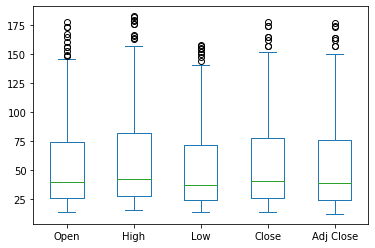

In [ ]:
apple[['Open','High','Low','Close','Adj Close']].plot(kind='box')

Setting the layout for our plot

In [ ]:
layout=go.Layout(
    title='Stock Prices Of Apple',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New monospace',
            size=18,
            color='#7f7f7f'
            )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
        )
    )
)
apple_data=[{'x':apple['Date'],'y':apple['Close']}]
plot=go.Figure(data=apple_data,layout=layout)

In [ ]:
#plot(plot) #plotting offline
iplot(plot)


In [ ]:
#Building the regression model
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
#Split the data into train and test sets
X=np.array(apple.index).reshape(-1,1);
Y=apple['Close']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [ ]:
#feature scaling
scaler=StandardScaler().fit(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Creating a linear model
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#plot actual and predicted values from Train dataset
trace0=go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',
    name='Predicted'
    
)

In [ ]:
apple_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=apple_data,layout=layout)

In [ ]:
iplot(plot2)

In [ ]:
#Calculate scores for model evaluation
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
 '''
    



In [ ]:
print(scores)


Metric           Train                Test        
r2_score  0.7609938505446694	0.8122651520235734
MSE       536.7367560267173	459.96548228929805
 
